<a href="https://colab.research.google.com/github/SnehVerma0212/DeepFake-Detection/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

# Update the path based on your folder and file name
zip_path = "/content/drive/MyDrive/Deepfake Detection Project/real-vs-fake.zip"
extract_path = "/content/real-vs-fake"  # This is where we'll extract it

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")


Extraction complete.


In [ ]:
import tensorflow as tf
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/real-vs-fake/train", image_size=(224, 224), batch_size=32, label_mode='binary'
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/real-vs-fake/valid", image_size=(224, 224), batch_size=32, label_mode='binary'
)


NotFoundError: Could not find directory /content/real-vs-fake/train

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/Deepfake Detection Project/real-vs-fake.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()  # Lists all files/folders inside the ZIP


Streaming output truncated to the last 5000 lines.
real-vs-fake/valid/real/34825.jpg              2025-03-27 02:31:08        22488
real-vs-fake/valid/real/34827.jpg              2025-03-27 02:31:08        31086
real-vs-fake/valid/real/34828.jpg              2025-03-27 02:31:08        34474
real-vs-fake/valid/real/34832.jpg              2025-03-27 02:31:08        29979
real-vs-fake/valid/real/34836.jpg              2025-03-27 02:31:08        29346
real-vs-fake/valid/real/34839.jpg              2025-03-27 02:31:08        33599
real-vs-fake/valid/real/34847.jpg              2025-03-27 02:31:08        30501
real-vs-fake/valid/real/34848.jpg              2025-03-27 02:31:08        32038
real-vs-fake/valid/real/34852.jpg              2025-03-27 02:31:08        24788
real-vs-fake/valid/real/34861.jpg              2025-03-27 02:31:08        23554
real-vs-fake/valid/real/34864.jpg              2025-03-27 02:31:08        22503
real-vs-fake/valid/real/34868.jpg              2025-03-27 02:31:08   

In [ ]:
import os

# List all directories inside the extracted folder
extracted_path = "/content/real-vs-fake"
for root, dirs, files in os.walk(extracted_path):
    print(root)
    break  # just print top level


/content/real-vs-fake


In [ ]:
import os

# Show immediate subdirectories in the dataset folder
extracted_path = "/content/real-vs-fake"
subdirs = next(os.walk(extracted_path))[1]  # [1] gets folder names
print("Subdirectories:", subdirs)


Subdirectories: ['real-vs-fake']


In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/real-vs-fake/real-vs-fake/train",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    label_mode='binary'
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/real-vs-fake/real-vs-fake/valid",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    label_mode='binary'
)


Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

IMG_SIZE = 224  # Image size

# Define the CNN model
def create_model():
    model = keras.Sequential([
        keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

        layers.Rescaling(1./255),  # Normalize pixel values

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Create the model
model = create_model()

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 📦 Improve performance with prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
valid_dataset = valid_dataset.prefetch(buffer_size=AUTOTUNE)

# 📌 Define callbacks: EarlyStopping and ModelCheckpoint
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
]

# 🔧 (Re)Compile the model (recommended before training)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 🚀 Train the model
EPOCHS = 10  # Adjust based on time available or performance
history = model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)

# 💾 Save final model (optional if best_model.h5 is enough)
model.save("final_model.h5")


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6747 - loss: 0.5935

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 188s 57ms/step - accuracy: 0.6747 - loss: 0.5935 - val_accuracy: 0.8388 - val_loss: 0.3748
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8489 - loss: 0.3548

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 183s 59ms/step - accuracy: 0.8489 - loss: 0.3548 - val_accuracy: 0.8824 - val_loss: 0.2763
Epoch 3/10
3124/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8994 - loss: 0.2463

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 180s 52ms/step - accuracy: 0.8994 - loss: 0.2463 - val_accuracy: 0.9000 - val_loss: 0.2474
Epoch 4/10
3124/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9218 - loss: 0.1979

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 222s 58ms/step - accuracy: 0.9218 - loss: 0.1978 - val_accuracy: 0.9209 - val_loss: 0.1971
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9346 - loss: 0.1640

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 181s 51ms/step - accuracy: 0.9346 - loss: 0.1640 - val_accuracy: 0.9327 - val_loss: 0.1762
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9453 - loss: 0.1401

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 201s 51ms/step - accuracy: 0.9453 - loss: 0.1401 - val_accuracy: 0.9355 - val_loss: 0.1675
Epoch 7/10
3124/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9532 - loss: 0.1204

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 160s 51ms/step - accuracy: 0.9532 - loss: 0.1204 - val_accuracy: 0.9470 - val_loss: 0.1506
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 202s 51ms/step - accuracy: 0.9574 - loss: 0.1070 - val_accuracy: 0.9424 - val_loss: 0.1660
Epoch 9/10
3124/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9629 - loss: 0.0965

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 159s 51ms/step - accuracy: 0.9629 - loss: 0.0965 - val_accuracy: 0.9480 - val_loss: 0.1487
Epoch 10/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9666 - loss: 0.0894

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 203s 51ms/step - accuracy: 0.9666 - loss: 0.0894 - val_accuracy: 0.9513 - val_loss: 0.1392


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/real-vs-fake/real-vs-fake/test',  # Update this path if needed
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)


Found 20000 files belonging to 2 classes.


In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.4f}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9448 - loss: 0.1544
Test Accuracy: 0.9506


In [ ]:
model.save("deepfake_detector_model.h5")


625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 41ms/step


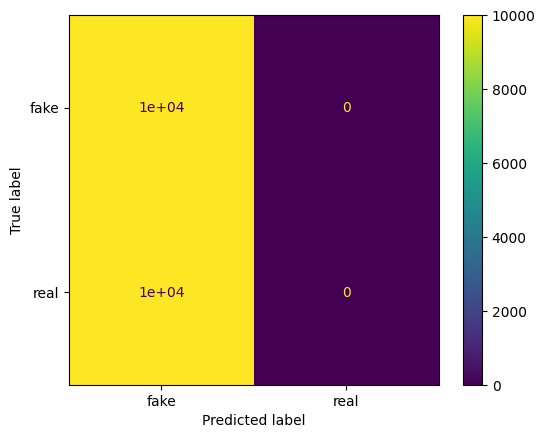

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred = model.predict(test_dataset)
y_pred_labels = np.argmax(y_pred, axis=1)

# Get true labels
y_true = np.concatenate([y for x, y in test_dataset], axis=0)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_dataset.class_names)
disp.plot()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step


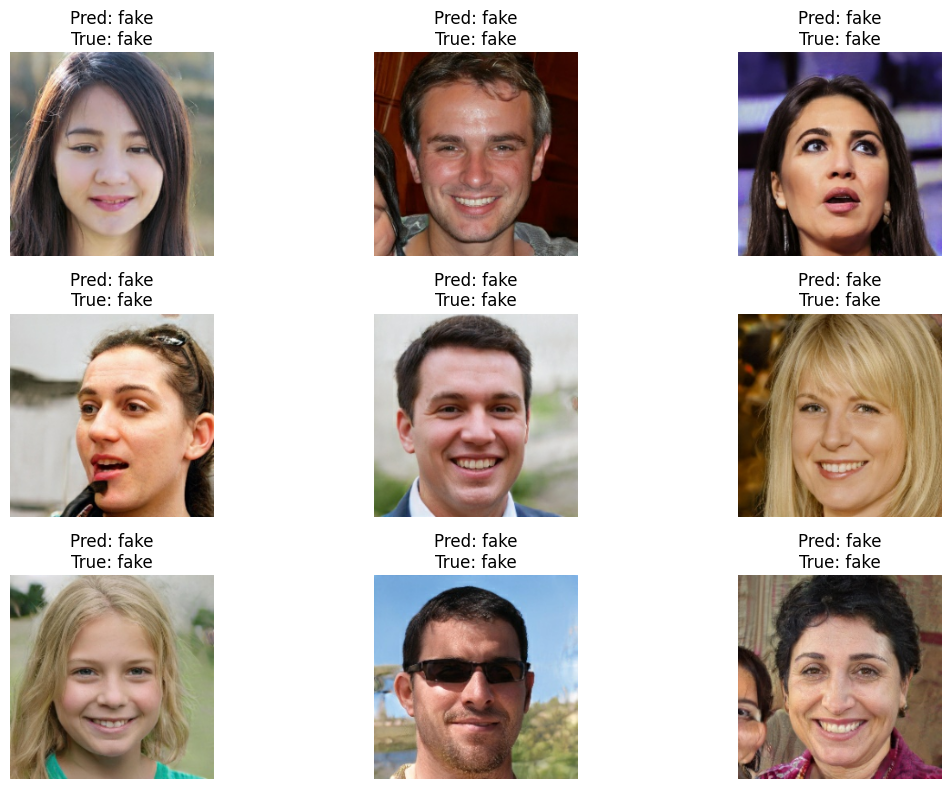

In [ ]:
import matplotlib.pyplot as plt

for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    plt.figure(figsize=(12, 8))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {test_dataset.class_names[predicted_classes[i]]}\nTrue: {test_dataset.class_names[labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


In [ ]:
import os

print("Fake images:", len(os.listdir('/content/real-vs-fake/real-vs-fake/train/fake')))
print("Real images:", len(os.listdir('/content/real-vs-fake/real-vs-fake/train/real')))


Fake images: 50000
Real images: 50000


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/real-vs-fake/real-vs-fake/train',
    image_size=(224, 224),
    batch_size=32
)
class_names = train_ds.class_names
print("Class Names:", class_names)


Found 100000 files belonging to 2 classes.
Class Names: ['fake', 'real']


In [ ]:
for images, labels in train_ds.take(1):
    print("Labels in this batch:", labels.numpy())


Labels in this batch: [1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1]


In [ ]:
for images, labels in valid_dataset.take(1):
    preds = model.predict(images)
    print("Predictions (first 10):", preds[:10].flatten())
    print("Rounded Predictions:", (preds[:10] > 0.5).astype(int).flatten())
    print("True labels:", labels[:10].numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predictions (first 10): [9.9523890e-01 4.4012651e-02 2.0779761e-02 9.9939501e-01 1.0000000e+00
 9.9999905e-01 5.5714386e-06 9.9998236e-01 1.9142531e-03 8.4260744e-14]
Rounded Predictions: [1 0 0 1 1 1 0 1 0 0]
True labels: [[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]]


In [ ]:
model.evaluate(train_ds)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 103s 33ms/step - accuracy: 0.9848 - loss: 0.0466


[0.04647338017821312, 0.9848200082778931]

In [ ]:
model.save("deepfake_model.keras")  # Recommended Keras format


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)


625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9448 - loss: 0.1544
Test Accuracy: 0.9506000280380249


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

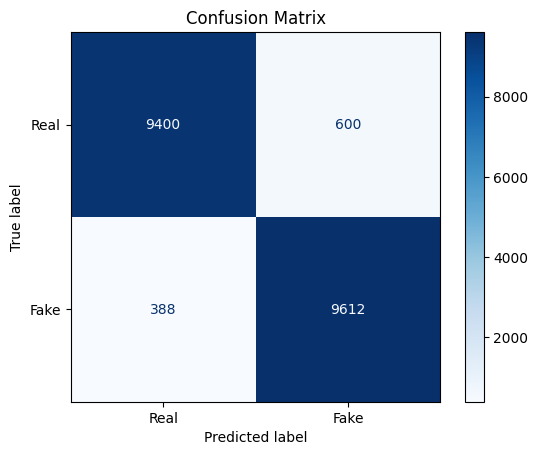

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    preds_rounded = np.round(preds).flatten()

    y_pred.extend(preds_rounded)
    y_true.extend(labels.numpy().flatten())

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
model.save("deepfake_model.keras")  # Native Keras format


In [ ]:
from google.colab import files
files.download("deepfake_model.keras")  # or "model.h5" if you used HDF5 format


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Assuming you have already created a test_dataset like this:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/real-vs-fake/real-vs-fake/test",
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'  # Since it's a binary classification task
)

# Evaluate model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy:.2f}")


Found 20000 files belonging to 2 classes.
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.9516 - loss: 0.1373
Test Accuracy: 0.95


Found 20000 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


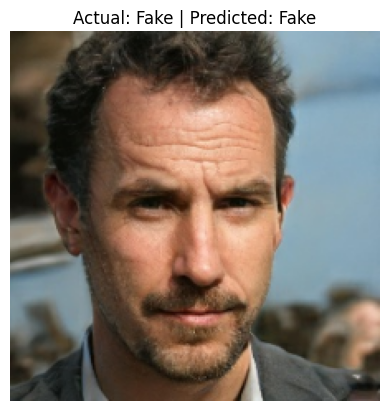

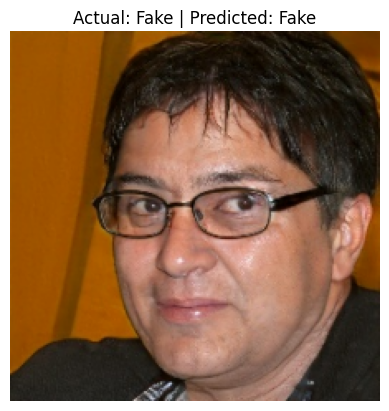

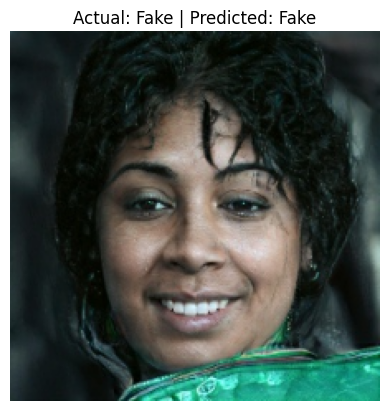

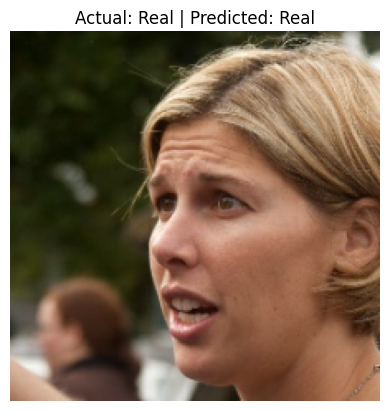

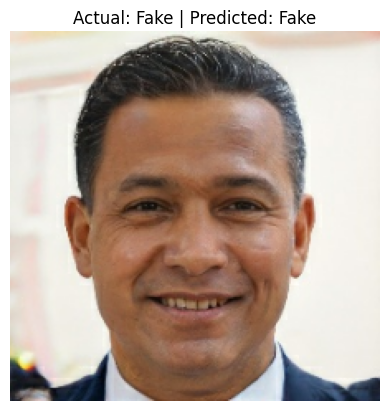

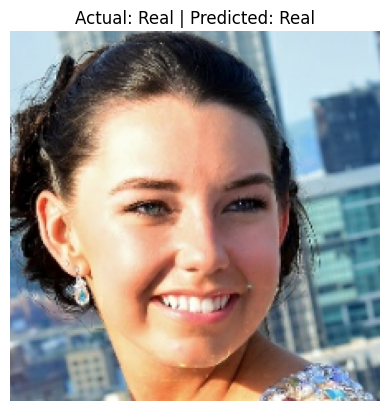

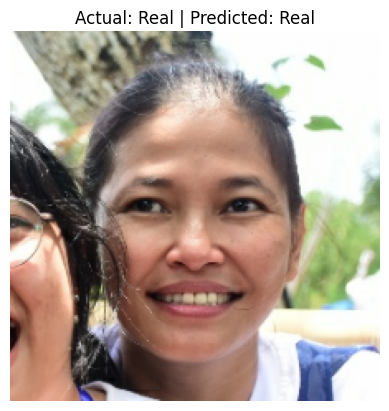

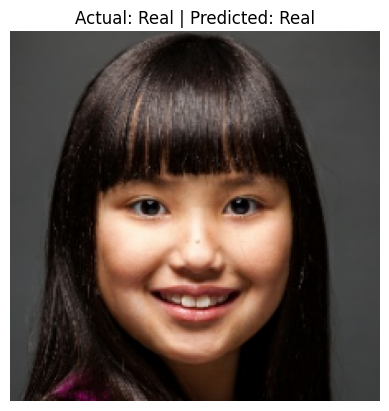

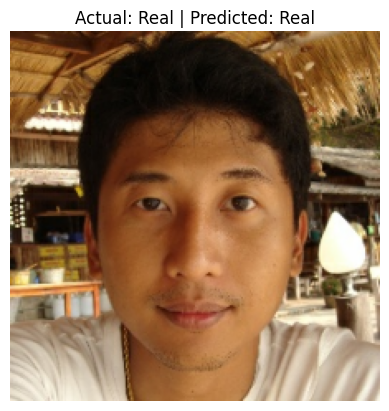

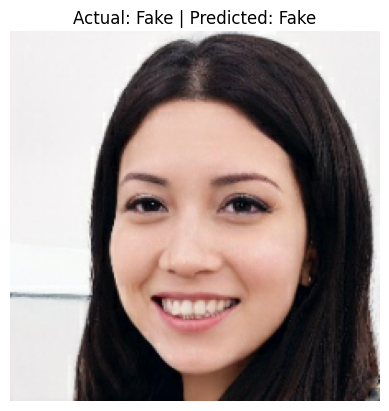

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 224
BATCH_SIZE = 32

# Load test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/real-vs-fake/real-vs-fake/test",
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='binary',
    shuffle=True
)

# Get one batch from the dataset
for images, labels in test_dataset.take(1):
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype("int32")

    # Display first 10 predictions
    for i in range(10):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Actual: {'Real' if labels[i]==1 else 'Fake'} | Predicted: {'Real' if predicted_labels[i]==1 else 'Fake'}")
        plt.axis("off")
        plt.show()


In [ ]:
import tensorflow as tf
train_dataset = tf.keras.utils.image_dataset_from_directory("/content/real-vs-fake/real-vs-fake/train", image_size=(224, 224))
print(train_dataset.class_names)


Found 100000 files belonging to 2 classes.
['fake', 'real']


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 00MZYXAT77.jpg to 00MZYXAT77.jpg


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("deepfake_model.keras")  # or .h5 if that’s the file


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("sneh.jpg", target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
confidence = float(prediction[0][0])  # convert to float

if confidence > 0.6:
    print(f"Prediction: Fake ({confidence * 100:.2f}%)")
elif confidence < 0.4:
    print(f"Prediction: Real ({(1 - confidence) * 100:.2f}%)")
else:
    print(f"Prediction: Uncertain ({confidence * 100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Prediction: Fake (99.66%)


In [ ]:
train_dataset.class_names  # should be ['fake', 'real'] or similar


['fake', 'real']

In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    #img_array = img_array / 255.0  # Same normalization as during training
    return img_array


In [3]:
img_path = "00KEKJJ1Q4.jpg"  # replace with actual image path
img_array = preprocess_image(img_path)
prediction = model.predict(img_array)[0][0]

if prediction > 0.5:
    print(f"Prediction: Real ({prediction * 100:.2f}%)")
else:
    print(f"Prediction: Fake ({(1 - prediction) * 100:.2f}%)")
print("Prediction score:", prediction)
confidence = float(prediction)
print("Raw prediction:", confidence)
if confidence > 0.5:
    print(f"Predicted: real with {confidence * 100:.2f}% confidence")
else:
    print(f"Predicted: fake with {(1 - confidence) * 100:.2f}% confidence")


FileNotFoundError: [Errno 2] No such file or directory: '00KEKJJ1Q4.jpg'

In [ ]:
img_array = preprocess_image("00MZYXAT77.jpg")
prediction = model.predict(img_array)[0][0]

print(f"Raw prediction score: {prediction:.4f}")

if prediction > 0.5:
    print(f"Predicted: REAL ({prediction * 100:.2f}%)")
else:
    print(f"Predicted: FAKE ({(1 - prediction) * 100:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Raw prediction score: 0.9951
Predicted: REAL (99.51%)


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data = image_dataset_from_directory(
    "/content/real-vs-fake/real-vs-fake/train",
    image_size=(224, 224),
    batch_size=32
)

print("Class names:", train_data.class_names)


Found 100000 files belonging to 2 classes.
Class names: ['fake', 'real']


In [1]:
model.evaluate(valid_dataset)


NameError: name 'model' is not defined